In [40]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np
# Load interactive widgets
import ipywidgets as widgets
import ipyvolume as ipv

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# Function to calculate the radial wave function (solving laguerre polynomial)
def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    return np.sqrt(
        ((2 / n * a0) ** 3 * (np.math.factorial(n - l - 1))) / (2 * n * (np.math.factorial(n + l)))
    ) * np.exp(-p / 2) * (p ** l) * laguerre(p)

In [42]:
def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))

    return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - np.abs(m)))
        / (4 * np.pi * np.math.factorial(l + np.abs(m)))) * legendre * np.real(np.exp(1.j * m * phi))

In [43]:
#Ylm = angular_function(0,0,theta,phi)
#Ylm
#%whos

In [44]:
def normalized_wavefunction(n, l, m, a0):

    # Bohr radius (a0) augmentation 
    a0 = 5.29e-11 * (1e+12 * a0)
    
    # Set coordinates grid to assign a certain probability to each point (x, y) in the plane
    x = y = np.linspace(-480, 480, 680)
    x, y = np.meshgrid(x, y)

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(n, l, np.sqrt((x ** 2 + y ** 2)), a0) * angular_function(m, l, np.arctan(x / (y + 1e-10)), 0)

    return np.abs(psi) ** 2

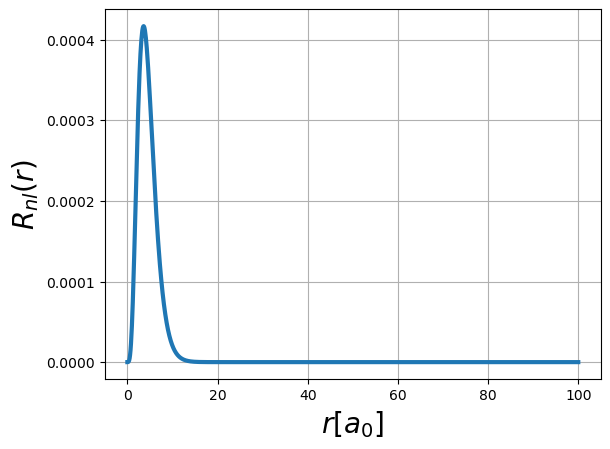

In [45]:
r = np.linspace(0,100,1000)

R = radial_function(3,2,r,0.6)

plt.plot(r, R**2, lw=3)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

In [46]:
#angular function limits

phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)



In [48]:
nmax=10

@widgets.interact(n = np.arange(1,nmax,1), l = np.arange(0,nmax-1,1))

def plot_radial(n=1,l=0):
    
    r =    np.linspace(0,250,10000)
    
    psi2 = radial_function(n, l, r, 0.6)**2 * (r**2)
    
    plt.plot(r, psi2, lw=2, color='red')
    

    ''' Styling the plot'''
    
    plt.xlabel('$r [a_0]$')

    plt.ylabel('$R_{nl}(r)$')
    
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    
    plt.xlim([0, 2*rmax])

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [49]:



def Ylm(l,m):
    phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)    
    return angular_function(m, l, theta, phi) 




nmax=10

@widgets.interact(m = np.arange(1,nmax,1), l = np.arange(0,nmax-1,1))

#conversion de unidades
def plot_3d(l,m):   
    x = np.sin(phi) * np.cos(theta) * abs(Ylm(l,m))
    y = np.sin(phi) * np.sin(theta) * abs(Ylm(l,m))
    z = np.cos(phi) * abs(Ylm(l,m))

    '''Set up the 3D Canvas'''
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')


    ''' Normalize color bar to [0,1] scale'''

    fcolors = (Ylm(l,m) - Ylm(l,m).min())/(Ylm(l,m).max() - Ylm(l,m).min())


    '''Make 3D plot of real part of spherical harmonic'''

    ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)



    ''' Project 3D plot onto 2D planes'''

    cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
    cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
    cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')



    ''' Set axes limit to keep aspect ratio 1:1:1 '''

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)


interactive(children=(Dropdown(description='l', options=(0, 1, 2, 3, 4, 5, 6, 7, 8), value=0), Dropdown(descri…